In [1]:
%matplotlib inline
import eden
import matplotlib.pyplot as plt
from eden.util import configure_logging
import logging

In [2]:
from itertools import tee, chain, islice
import numpy as np
import random
from time import time
import datetime
from graphlearn.graphlearn import GraphLearnSampler
from eden.util import fit,estimate
from eden.graph import Vectorizer
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

In [3]:
def plot(dataset, percentages, original_sample_repetitions, original_repetitions, sample_repetitions):
    gc={'color':'g'}
    rc={'color':'r'}
    bc={'color':'b'}
    ws = 0.02
    os = np.mean(original_sample_repetitions, axis=1)
    o = np.mean(original_repetitions, axis=1)
    s = np.mean(sample_repetitions, axis=1)
    plt.figure(figsize=(18,8))
    plt.grid()
    plt.boxplot(original_sample_repetitions, positions=percentages, widths=ws, capprops=gc, medianprops=gc, boxprops=gc, whiskerprops=gc, flierprops=gc)
    plt.plot(percentages,os, color='g', marker='o', markeredgewidth=1, markersize=7, markeredgecolor='g', markerfacecolor='w', label='original+sample')

    plt.boxplot(original_repetitions, positions=percentages, widths=ws, capprops=rc, medianprops=rc, boxprops=rc, whiskerprops=rc, flierprops=rc)
    plt.plot(percentages,o, color='r', marker='o', markeredgewidth=1, markersize=7, markeredgecolor='r', markerfacecolor='w', label='original')

    plt.boxplot(sample_repetitions, positions=percentages, widths=ws, capprops=bc, medianprops=bc, boxprops=bc, whiskerprops=bc, flierprops=bc)
    plt.plot(percentages,s, color='b', marker='o', markeredgewidth=1, markersize=7, markeredgecolor='b', markerfacecolor='w', label='sample')

    plt.xlim(percentages[0]-.05,percentages[-1]+.05)
    plt.title(dataset+'\n',fontsize=17)
    plt.legend(loc='lower right',fontsize=16)
    plt.ylabel('ROC AUC',fontsize=16)
    plt.xlabel('Dataset size (fraction)',fontsize=16)
    plt.savefig('%s_plot_predictive_performance_of_samples.pdf' % dataset)

In [4]:
def save_results(result_fname,percentages, original_repetitions,original_sample_repetitions,sample_repetitions):
    with open(result_fname,'w') as f:
        f.write('dataset sizes list:\n')
        for perc in percentages:
            f.write('%s '% perc)
        f.write('\n')
        f.write('AUC scores:\n')
        for repetitions in original_repetitions,original_sample_repetitions,sample_repetitions:
            f.write('%s\n' % len(repetitions))
            for repetition in repetitions:
                for auc in repetition:
                    f.write('%s ' % auc)
                f.write('\n')
    
def load_results(result_fname):
    with open(result_fname) as f:
        comment = next(f)
        line = next(f)
        percentages = [float(x) for x in line.split()]
        comment = next(f)

        original_repetitions = []
        size = int(next(f))
        for i in range(size):
            line = next(f)
            repetition = [float(x) for x in line.split()]
            original_repetitions.append(repetition)

        original_sample_repetitions = []
        size = int(next(f))
        for i in range(size):
            line = next(f)
            repetition = [float(x) for x in line.split()]
            original_sample_repetitions.append(repetition)


        sample_repetitions = []
        size = int(next(f))
        for i in range(size):
            line = next(f)
            repetition = [float(x) for x in line.split()]
            sample_repetitions.append(repetition)
            
    return percentages, original_repetitions,original_sample_repetitions,sample_repetitions

In [53]:
import numpy as np
import math

def score(experiment):
    return np.mean([np.mean(repetition) for repetition in experiment])

def scores(result_fname):
    percentages,\
    original_repetitions,\
    original_sample_repetitions,\
    sample_repetitions = load_results(result_fname)
    return  math.log10(score(original_sample_repetitions)/score(original_repetitions))

#Experimental pipeline

In [54]:
#setup
dataset_names = !cat NCI60/names
random.shuffle(dataset_names)

 0 +0.0058
 1 +0.0054
 2 +0.0046
 3 +0.0039
 4 +0.0034
 5 +0.0021
 6 +0.0019
 7 +0.0008
 8 +0.0008
 9 +0.0007
10 +0.0003
11 -0.0001
12 -0.0002
13 -0.0003
14 -0.0006
15 -0.0008
16 -0.0008
17 -0.0008
18 -0.0012
19 -0.0013
20 -0.0016
21 -0.0016
22 -0.0019
23 -0.0024
24 -0.0026
25 -0.0026
26 -0.0026
27 -0.0026
28 -0.0027
29 -0.0028
30 -0.0032
31 -0.0036
32 -0.0036
33 -0.0039
34 -0.0043
35 -0.0044
36 -0.0044
37 -0.0045
38 -0.0048
39 -0.0049
40 -0.0051
41 -0.0052
42 -0.0056
43 -0.0066
44 -0.0067
45 -0.0072
46 -0.0077
47 -0.0106


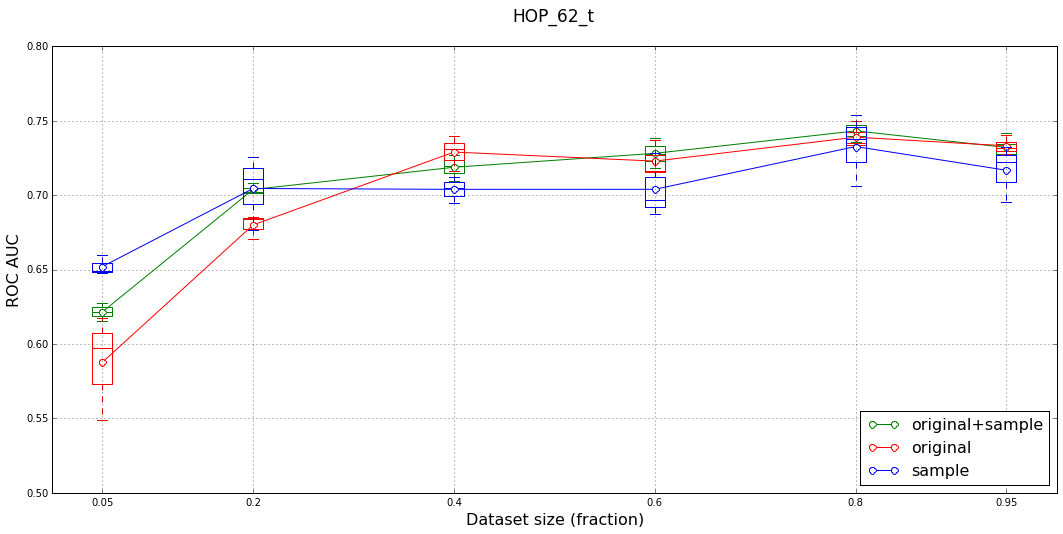

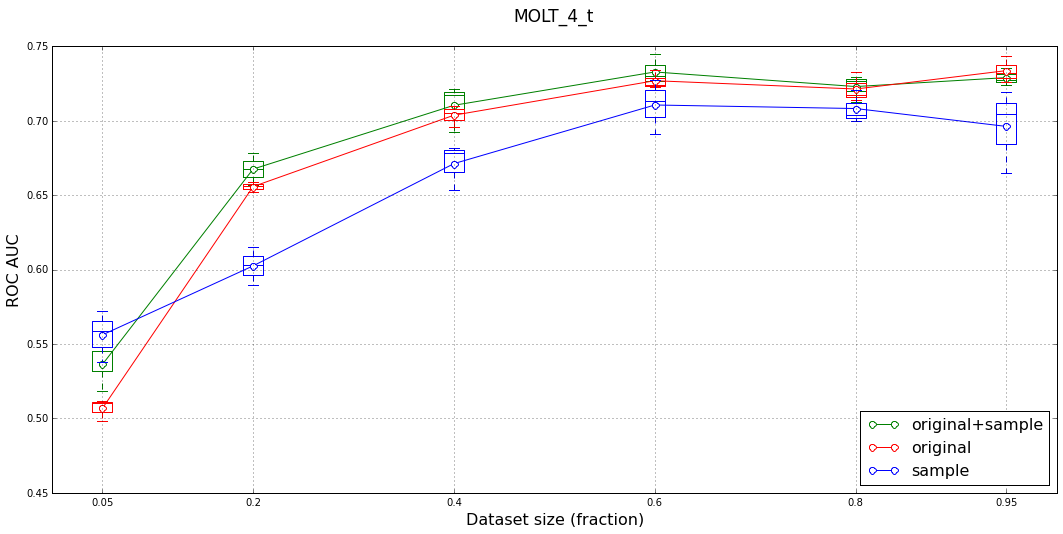

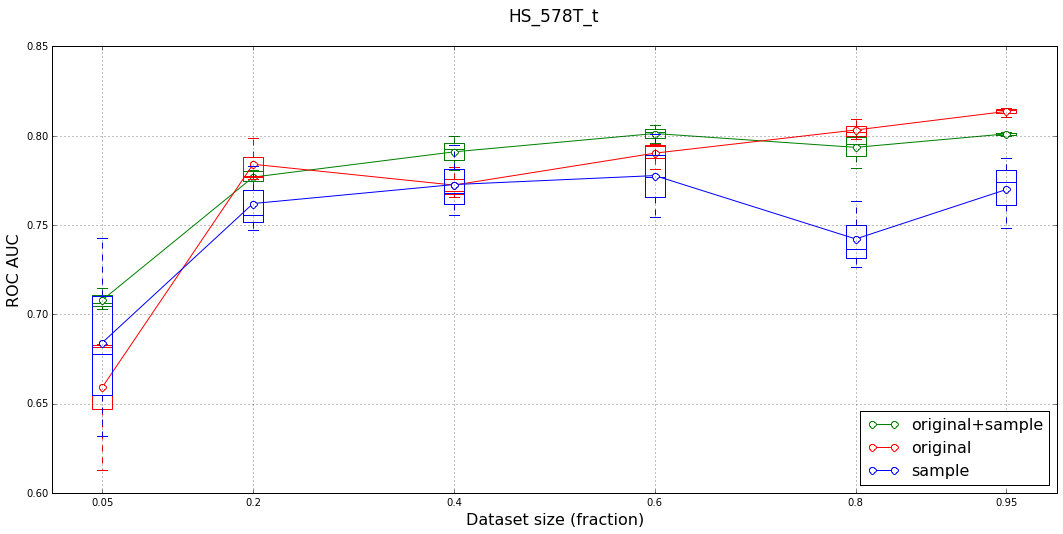

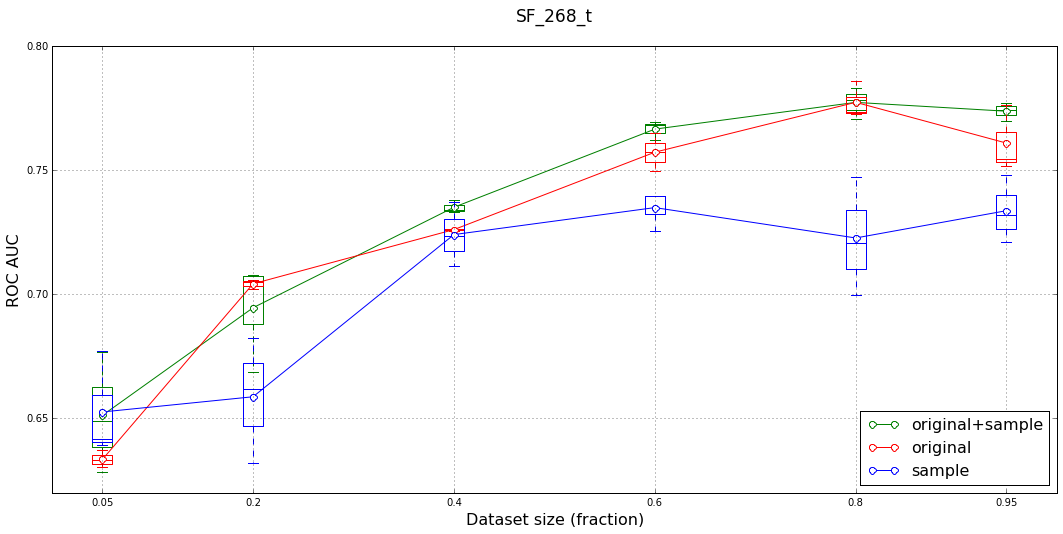

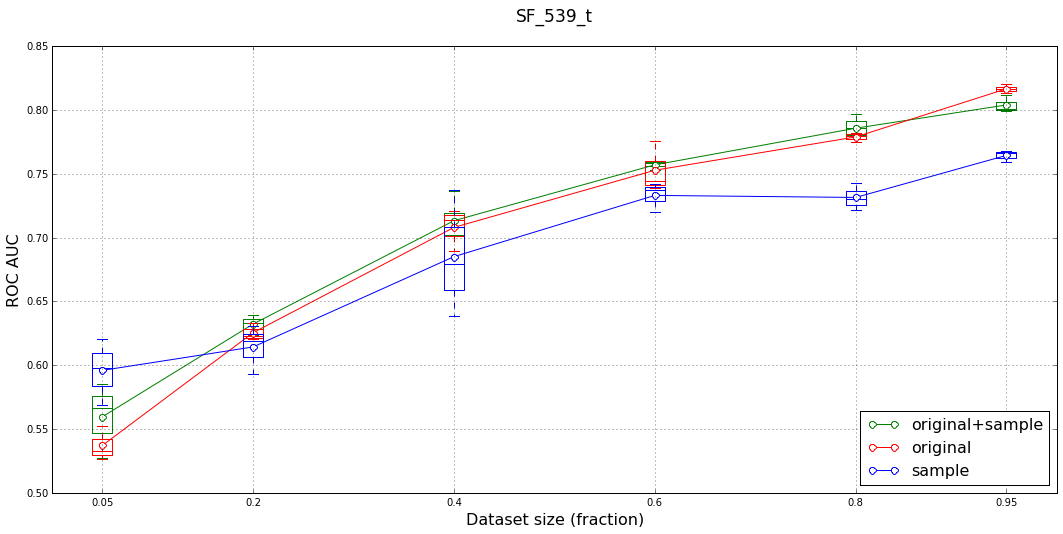

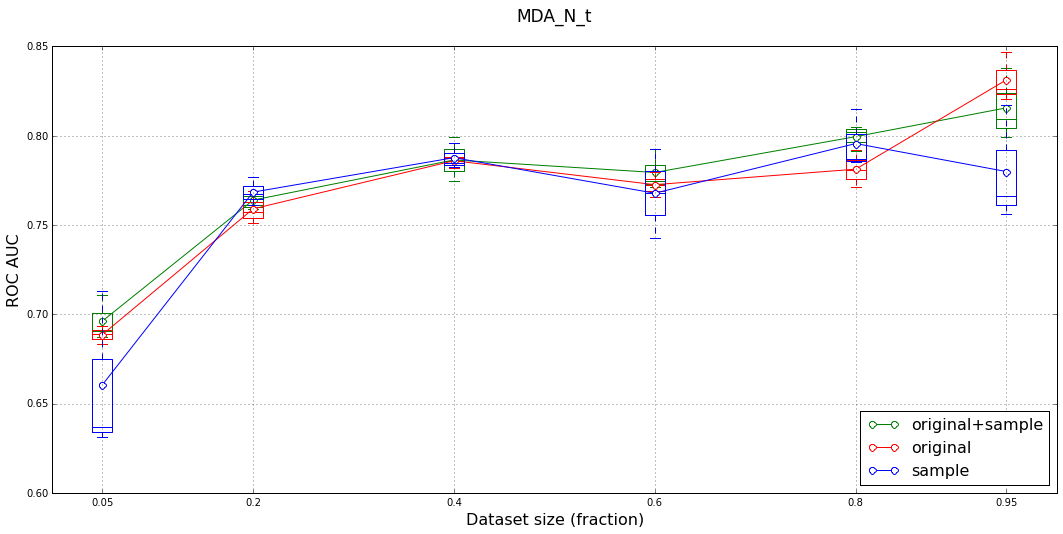

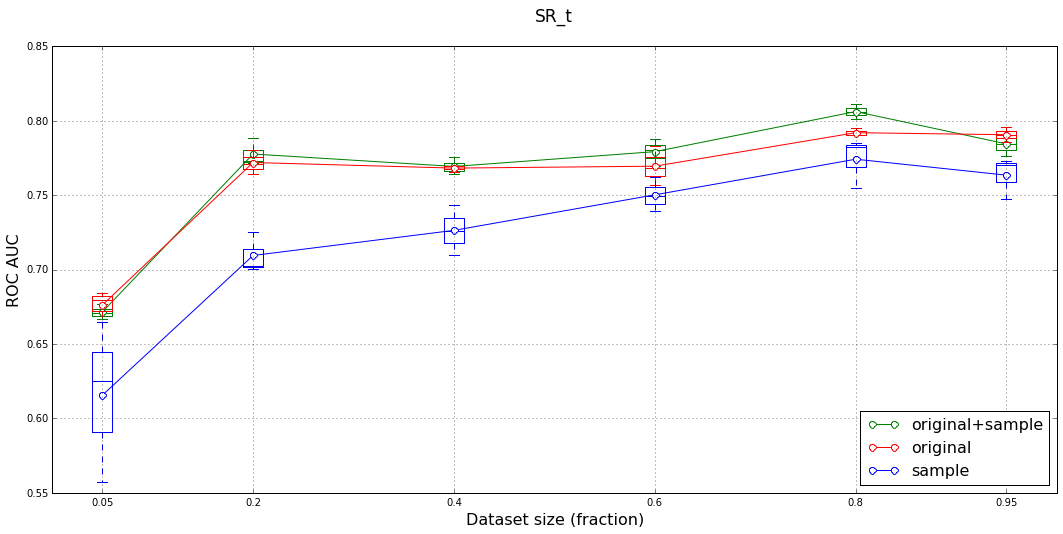

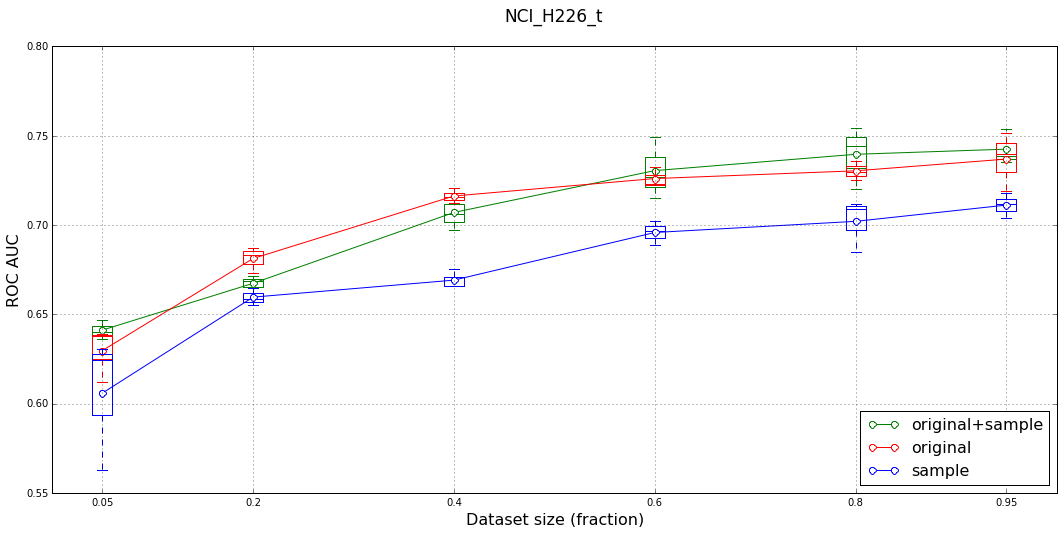

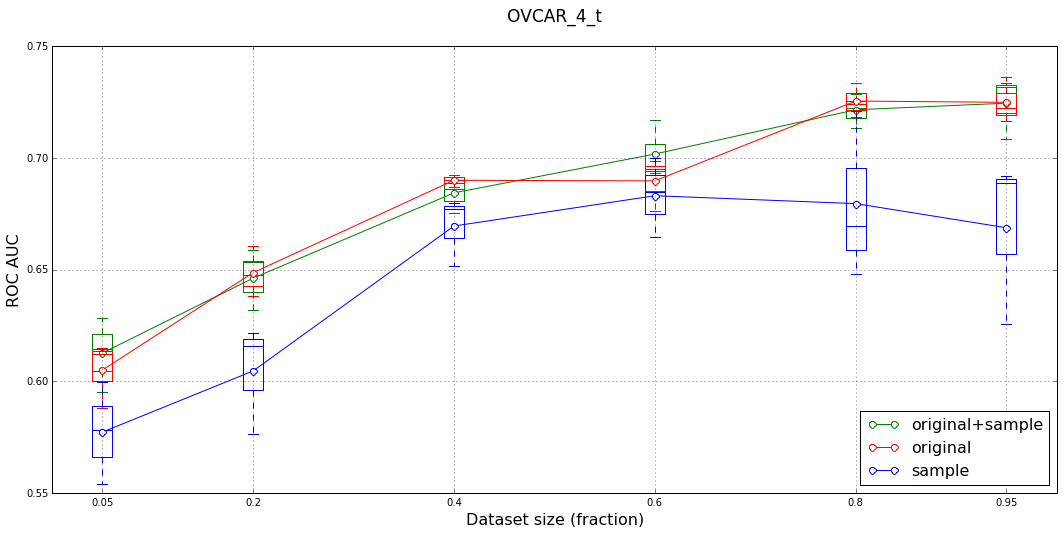

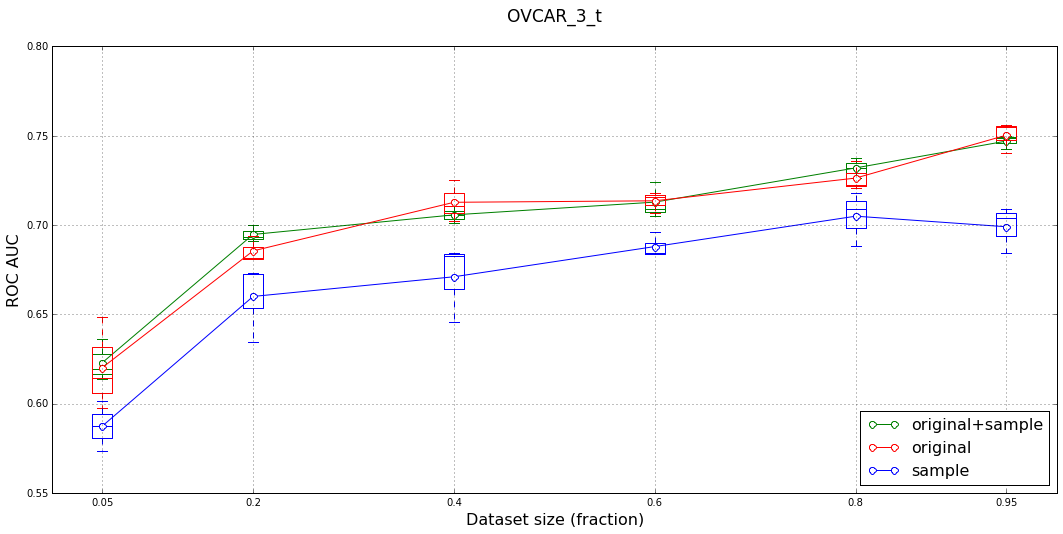

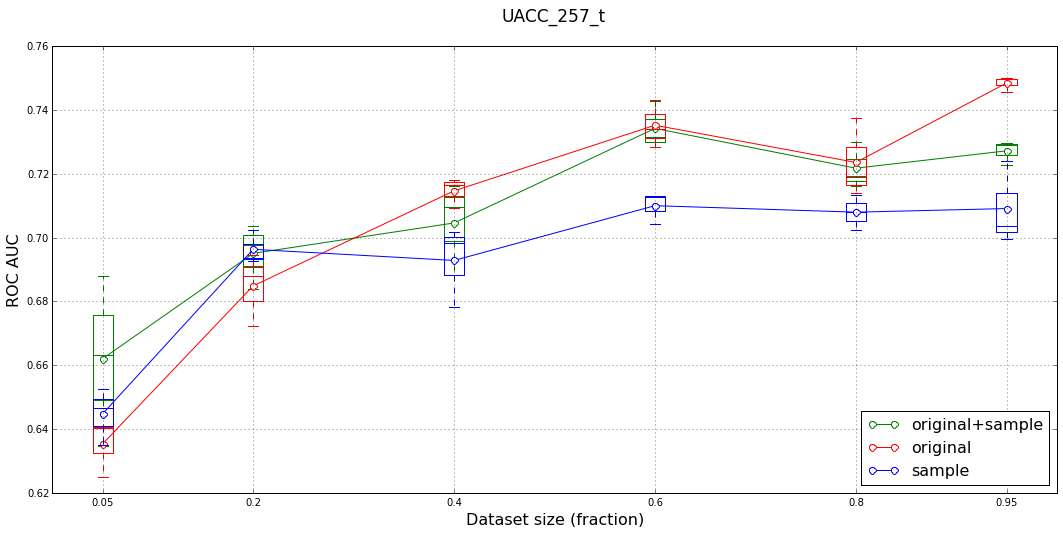

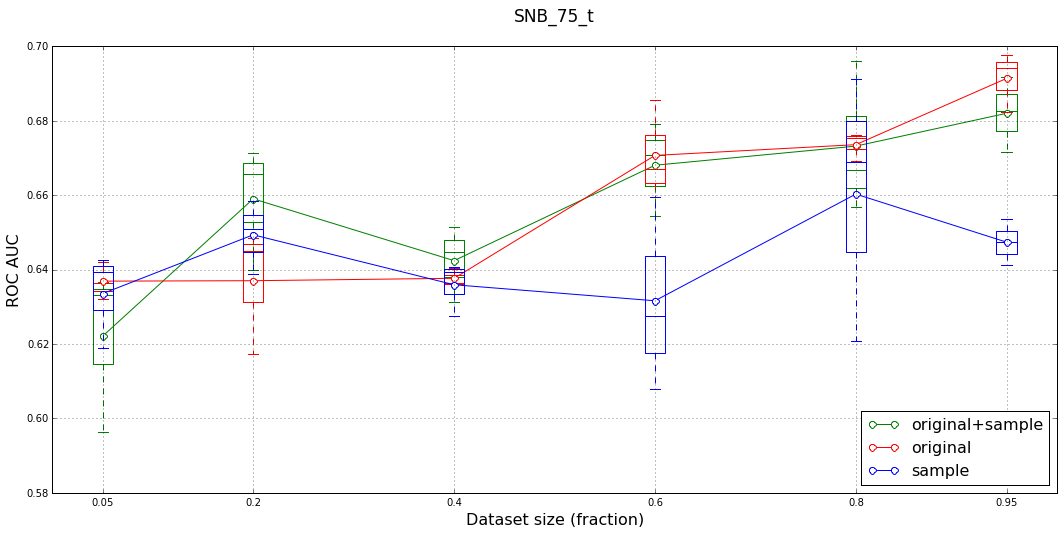

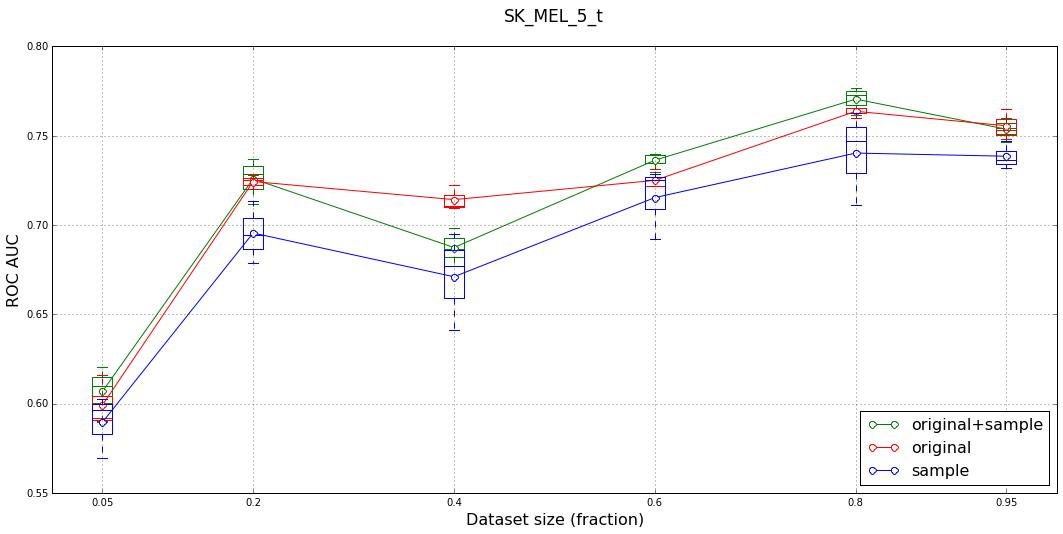

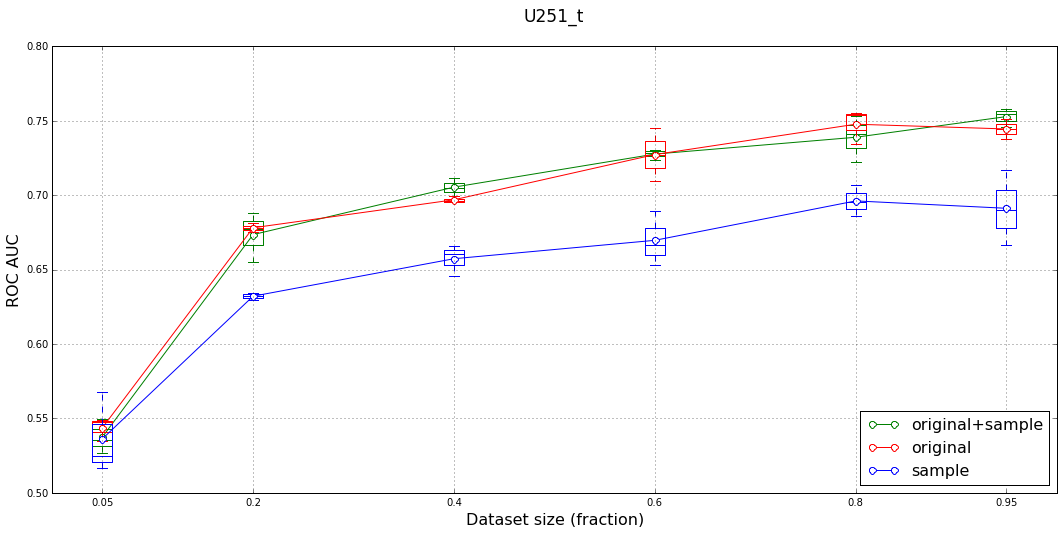

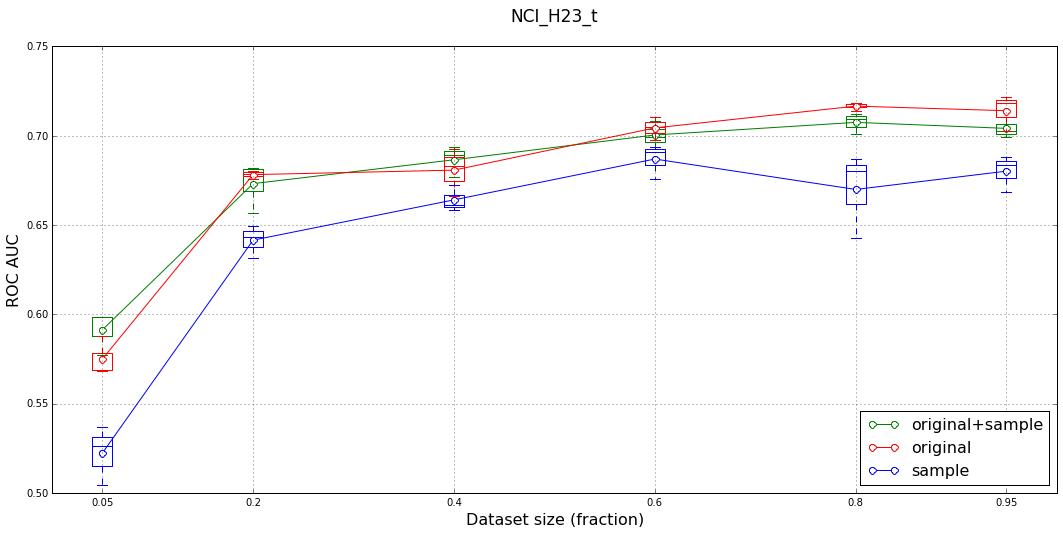

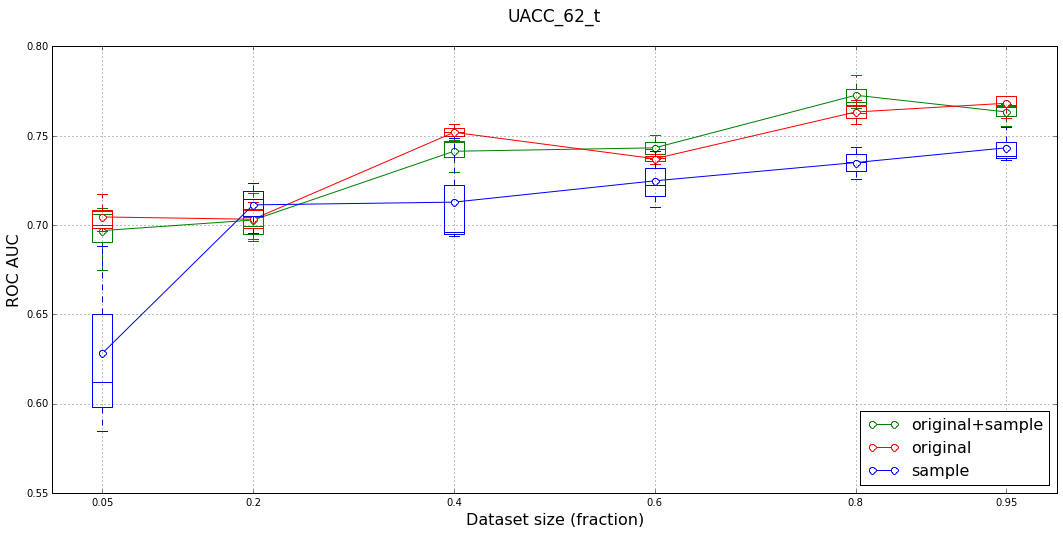

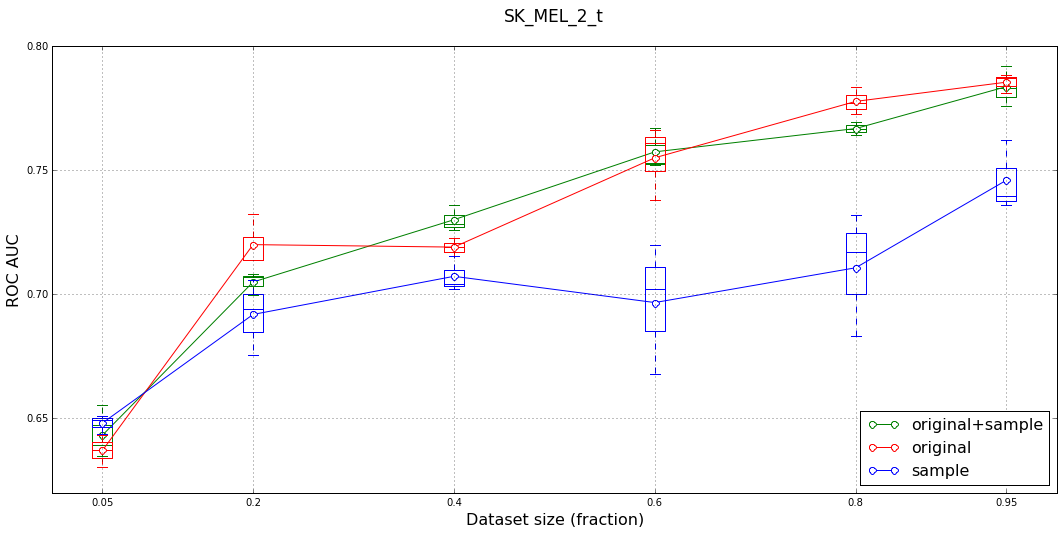

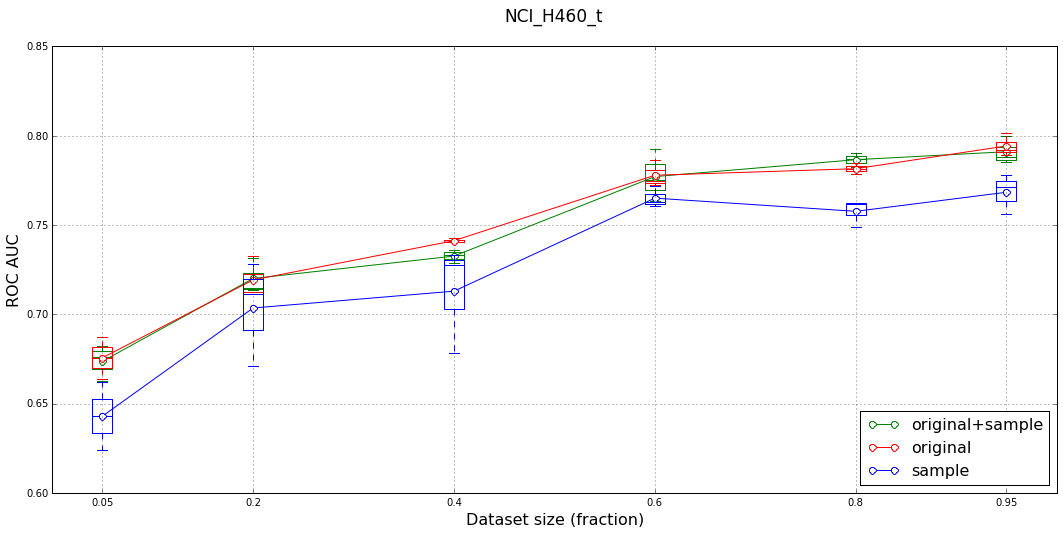

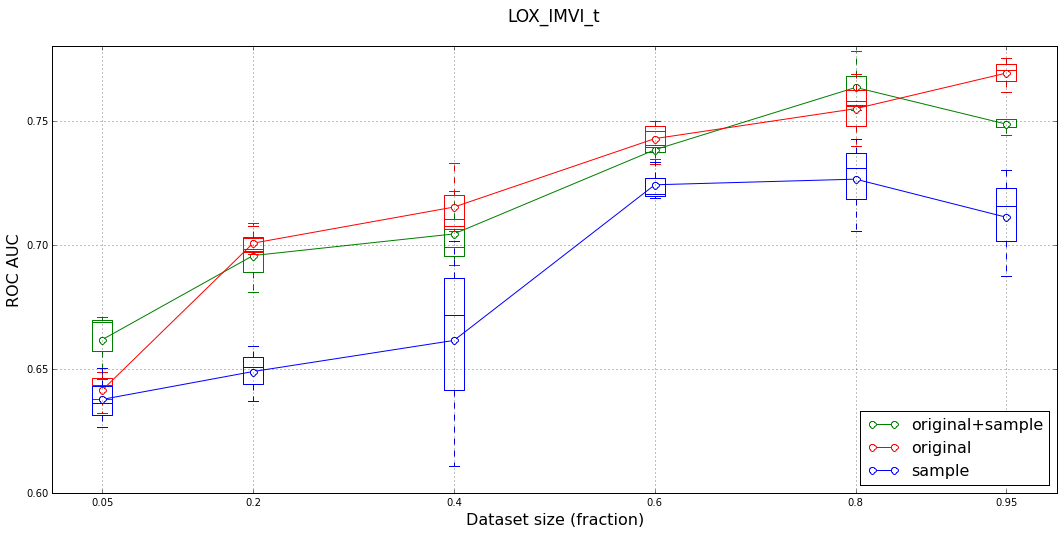

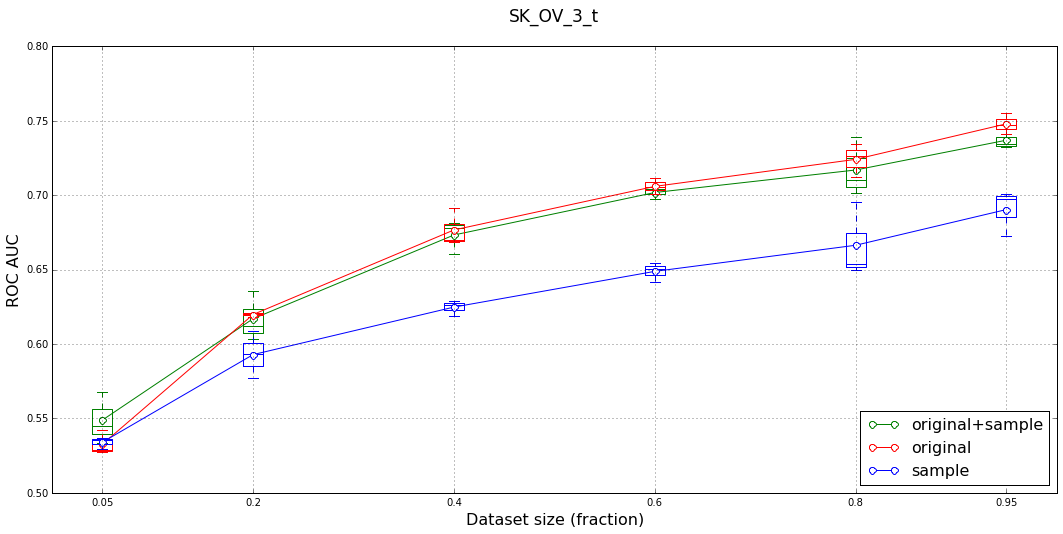

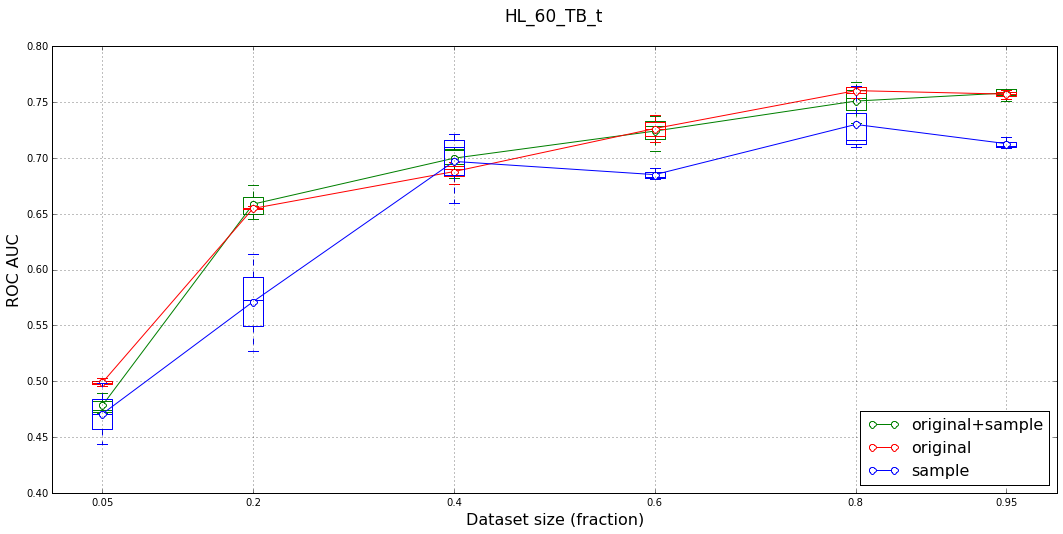

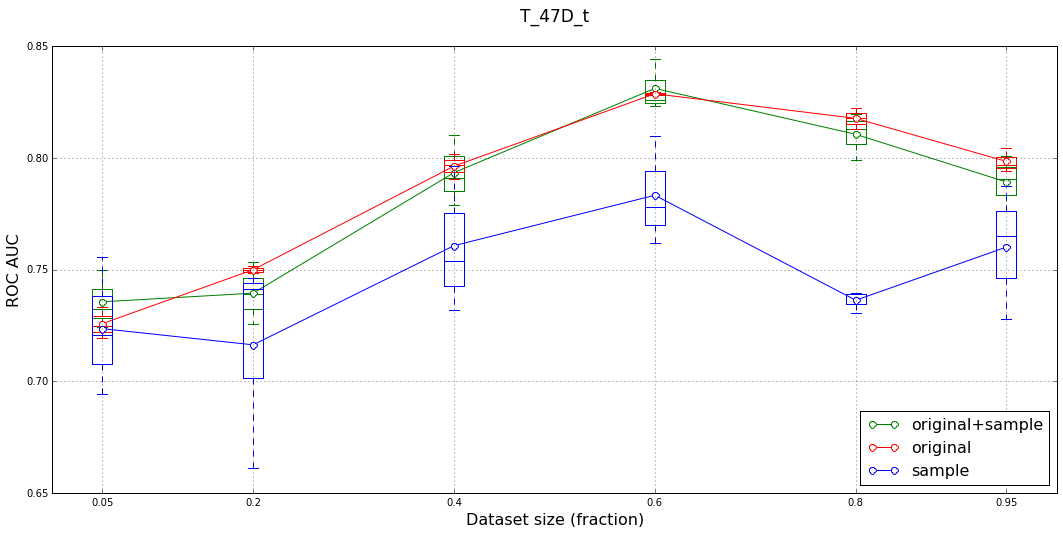

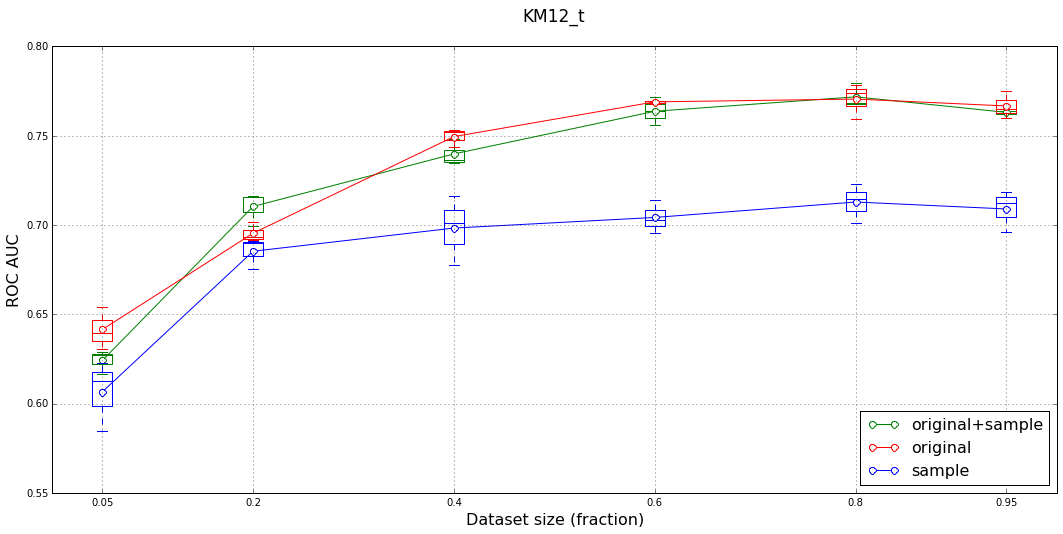

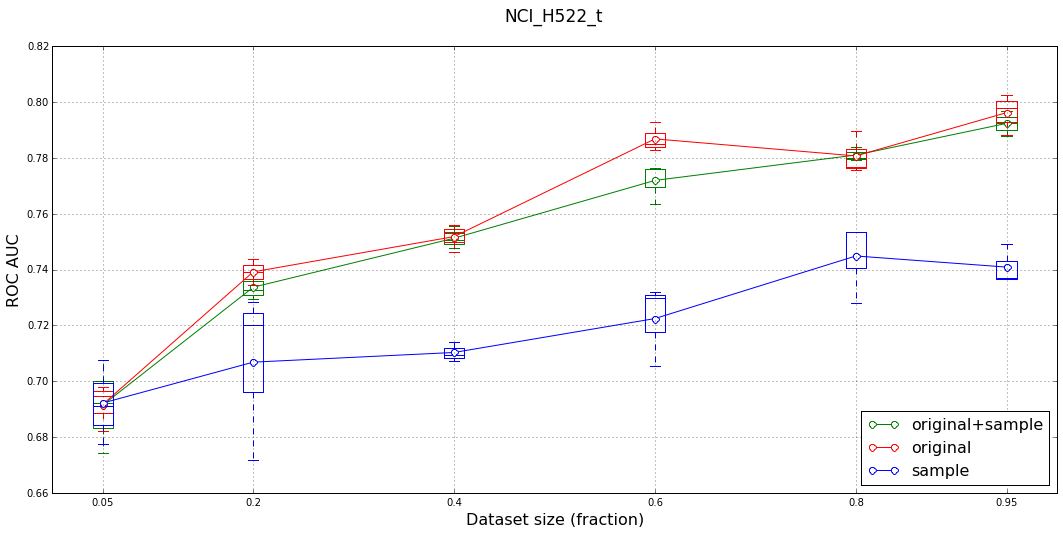

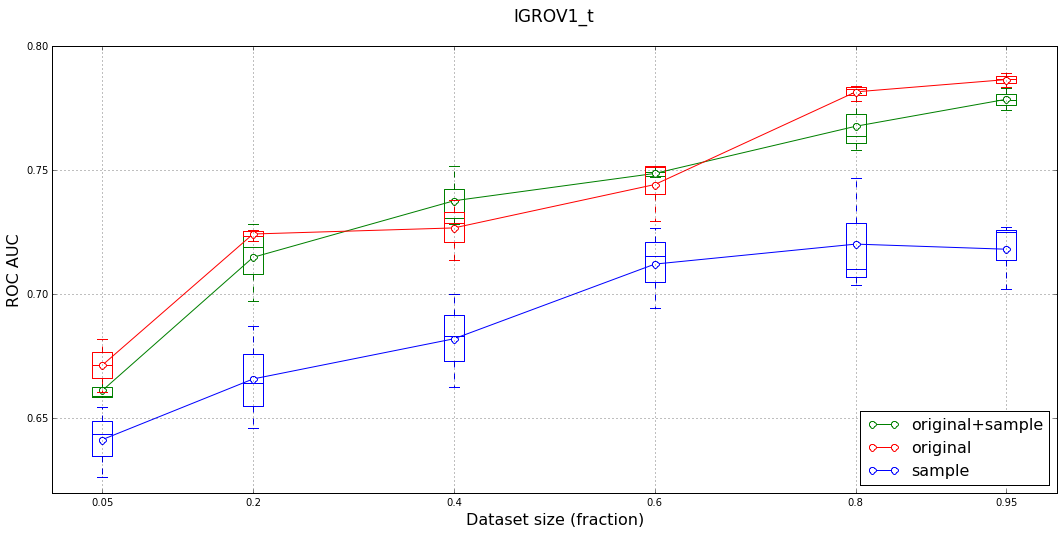

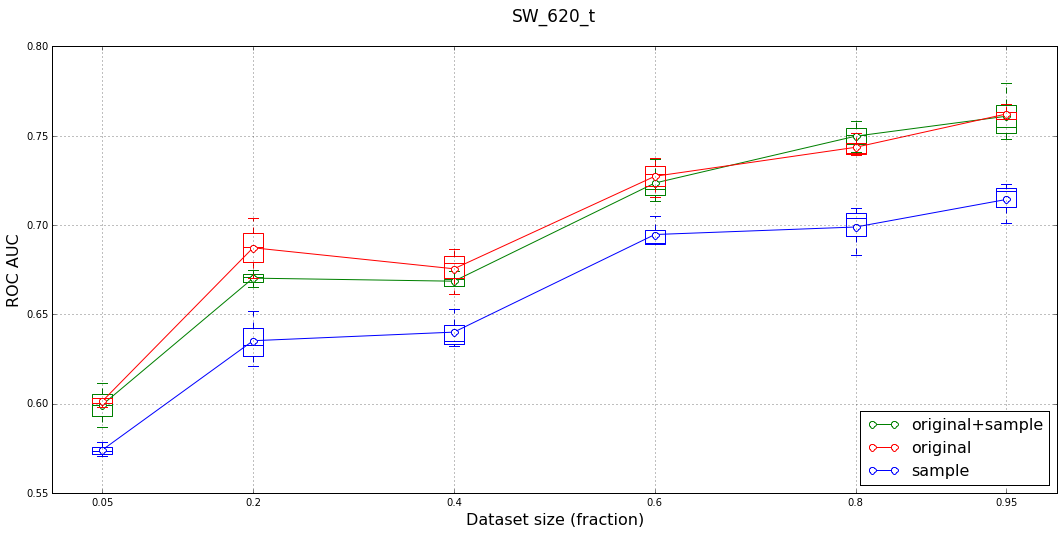

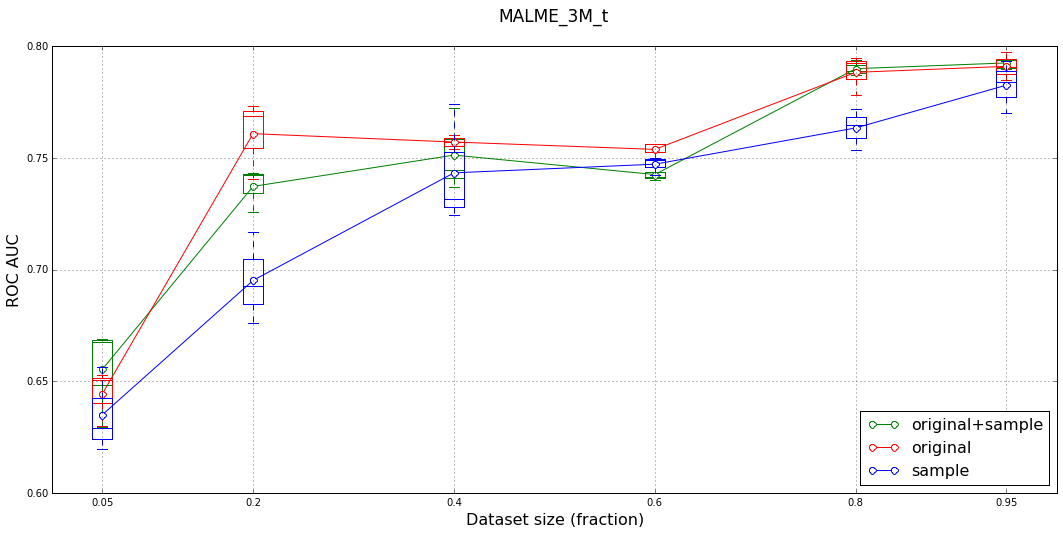

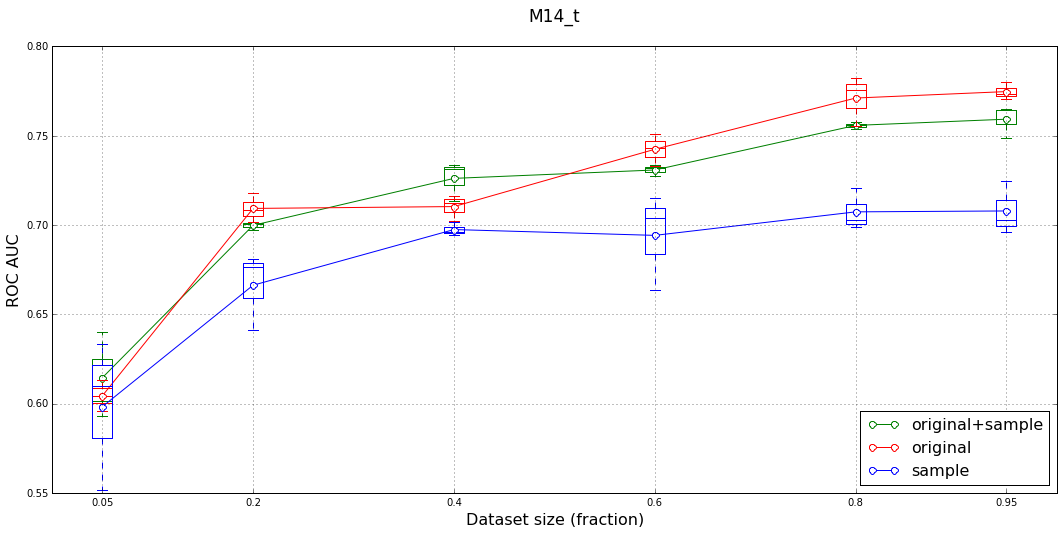

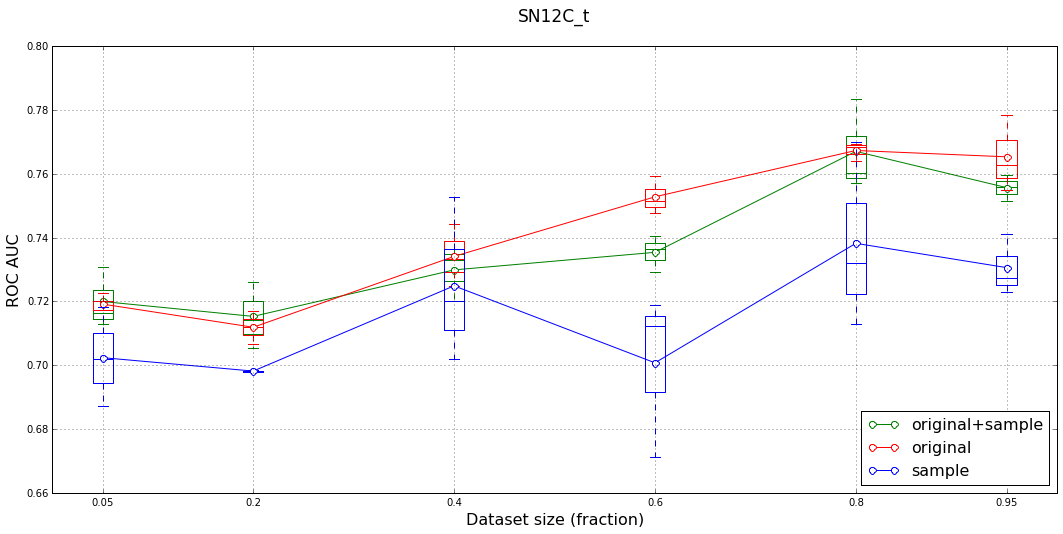

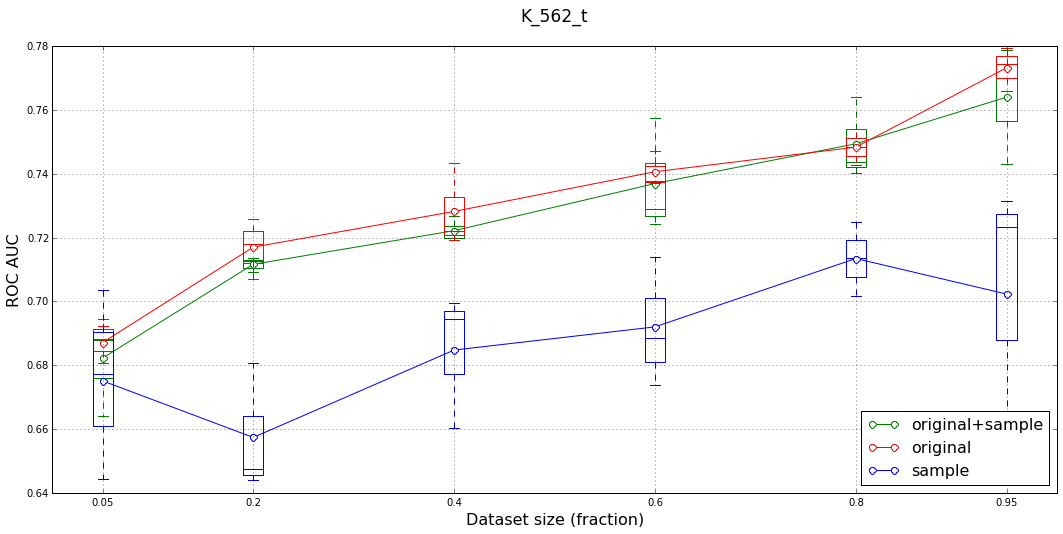

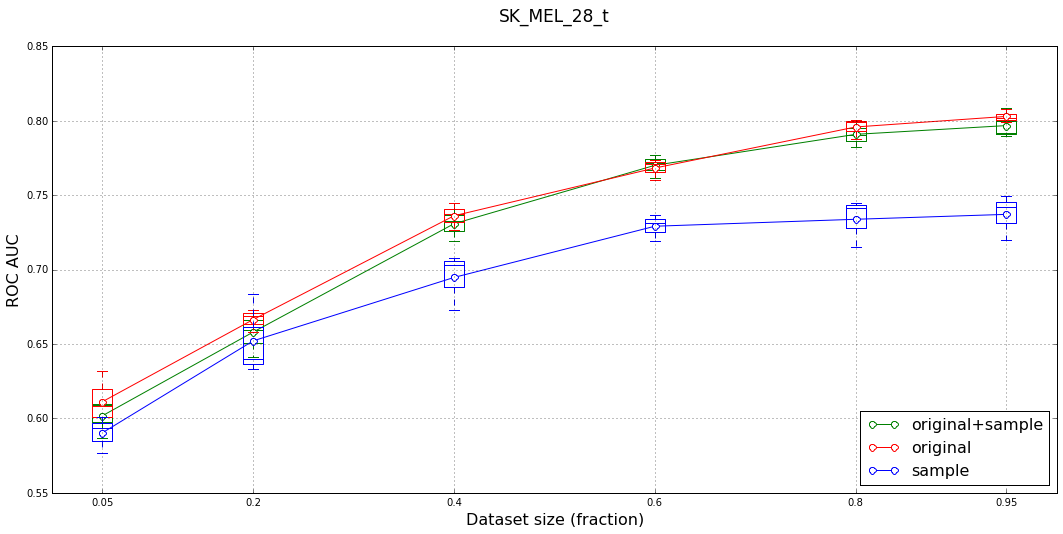

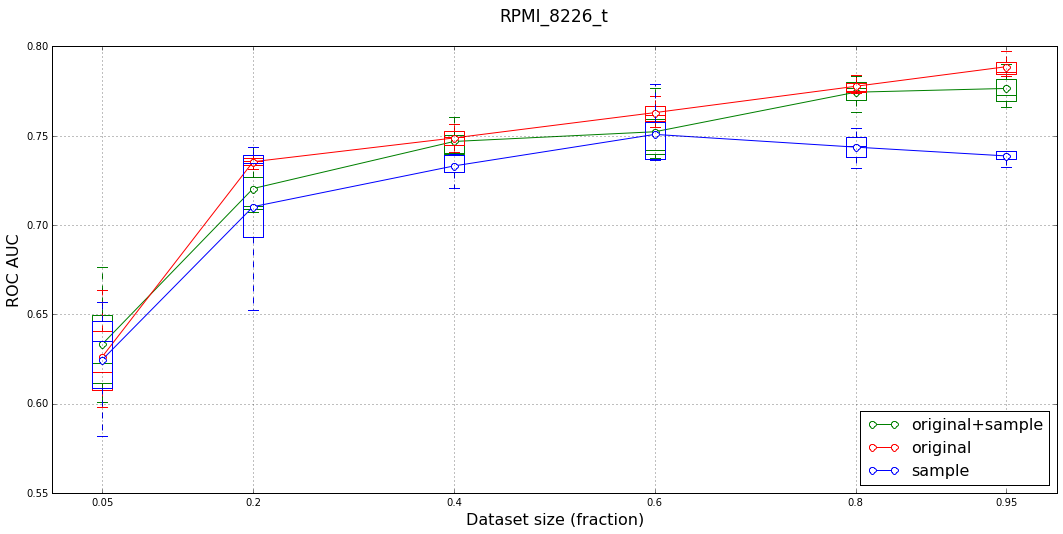

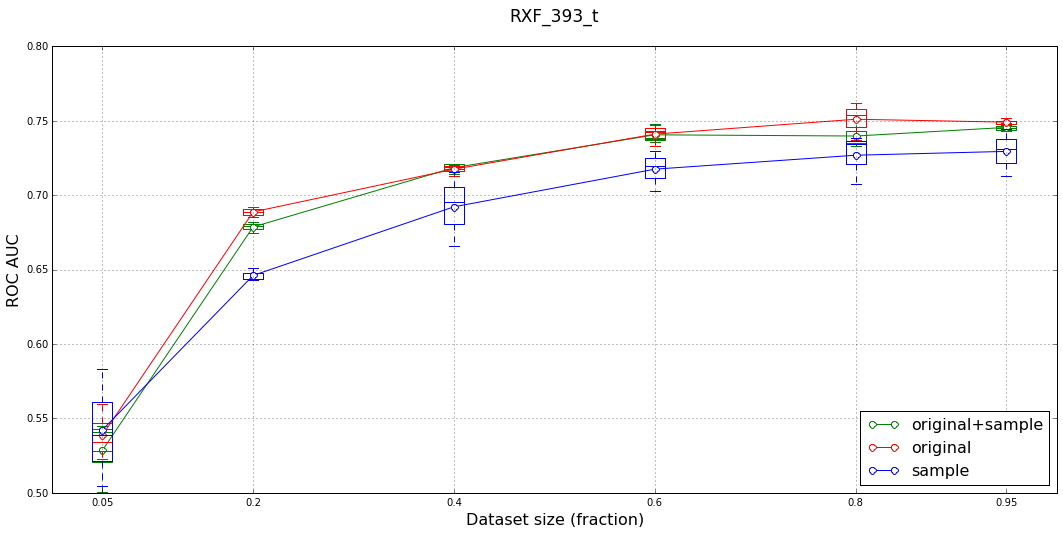

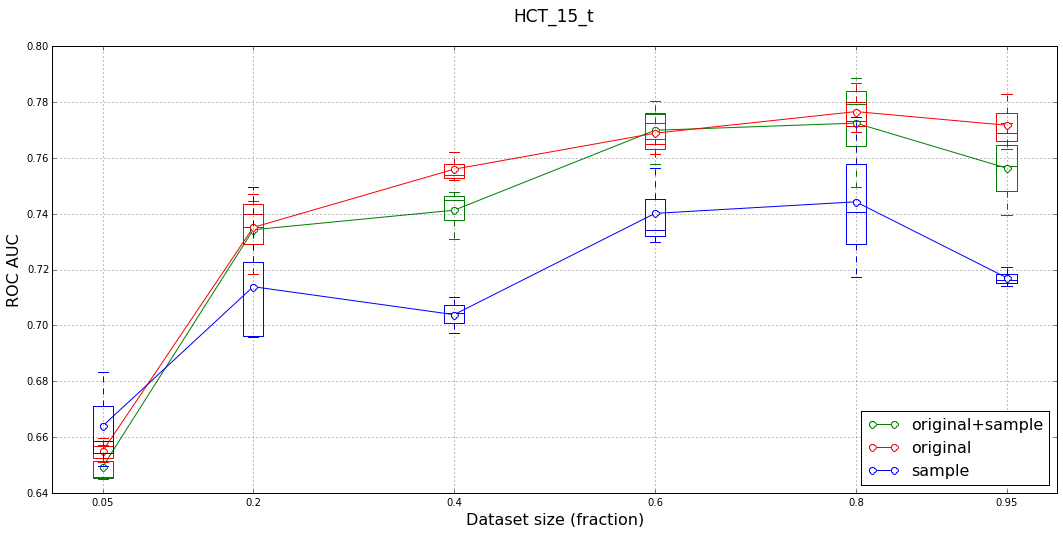

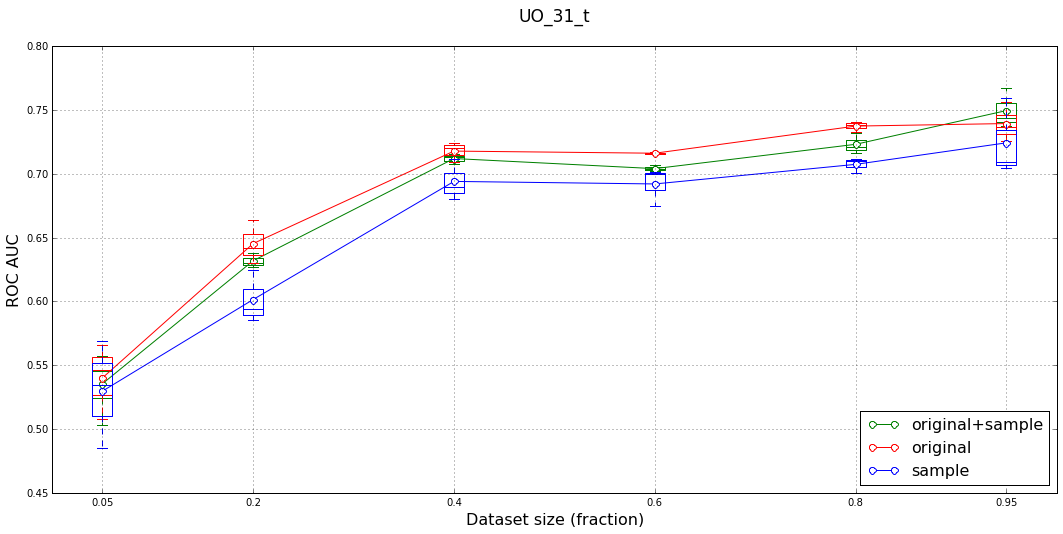

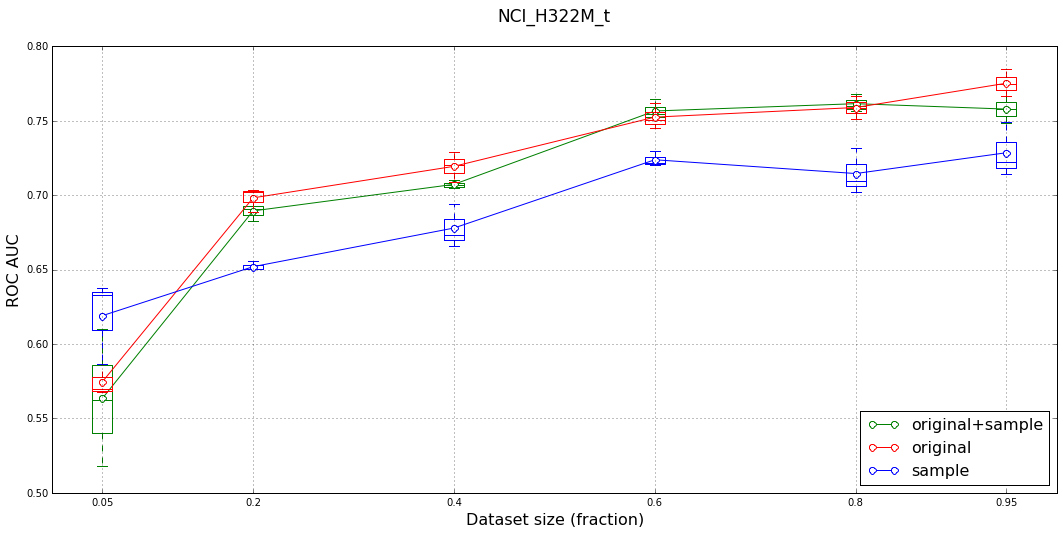

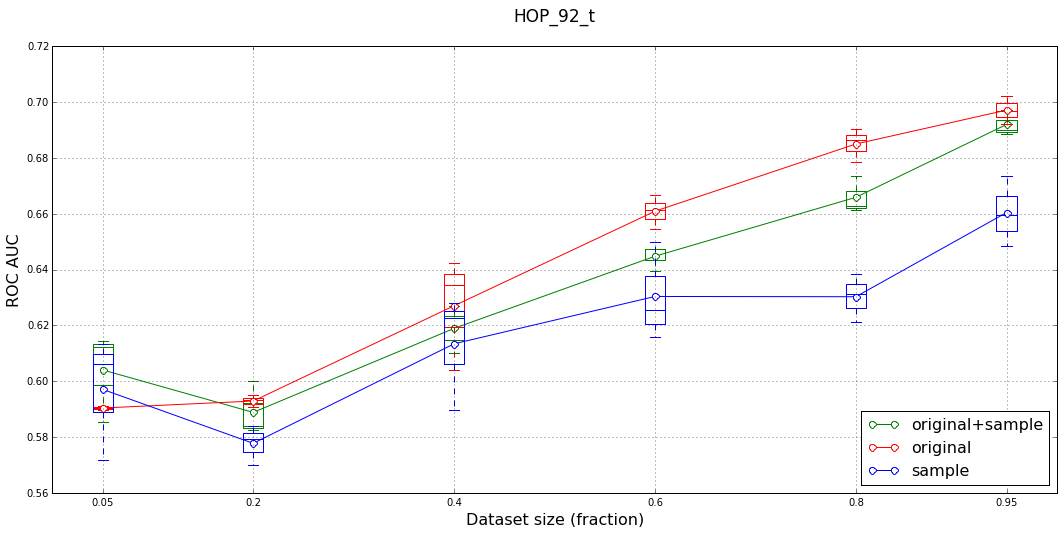

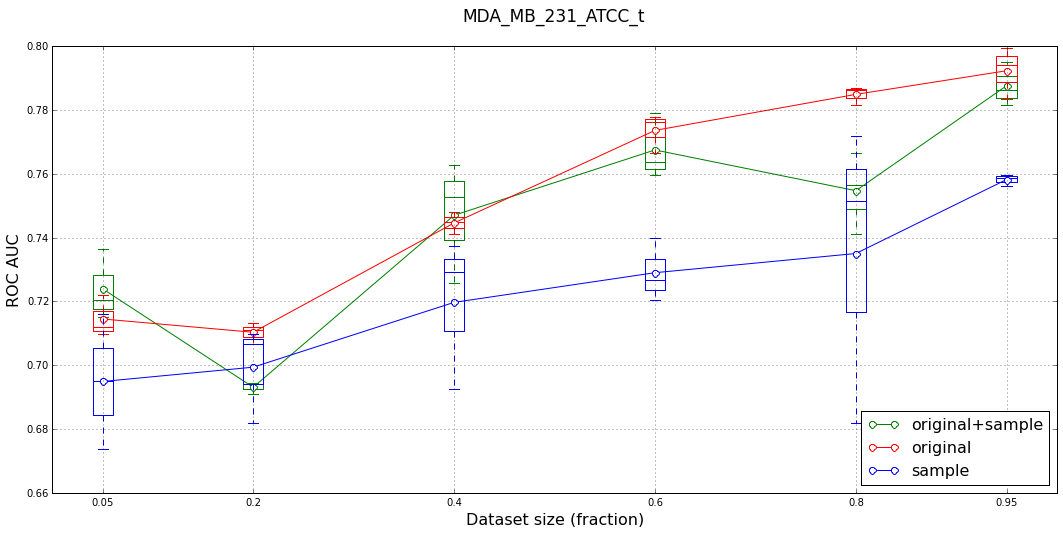

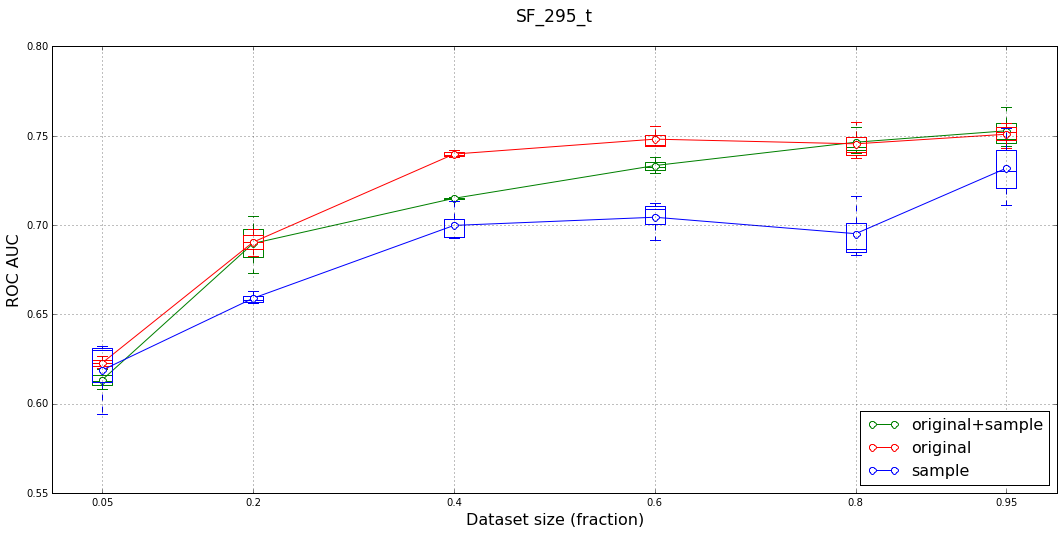

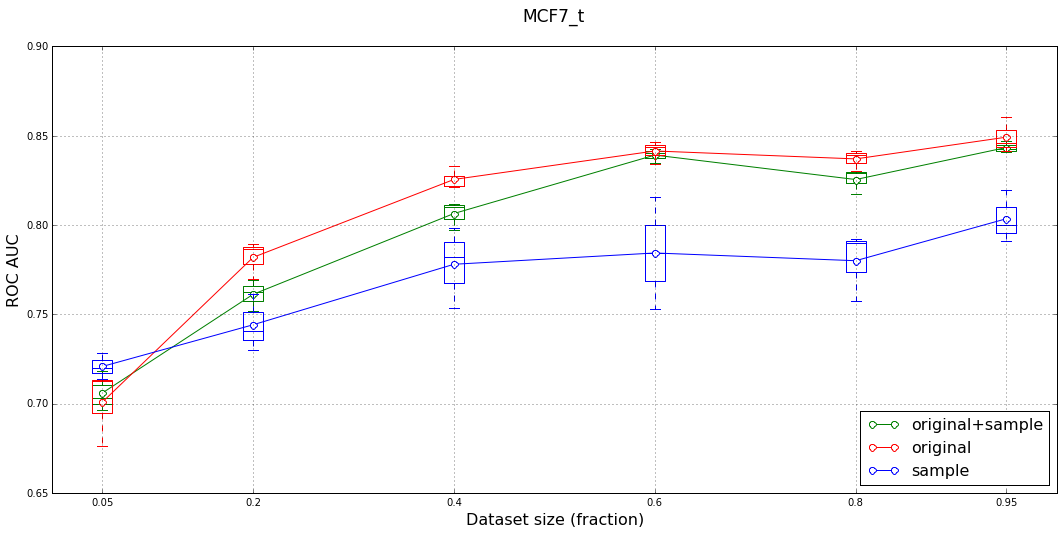

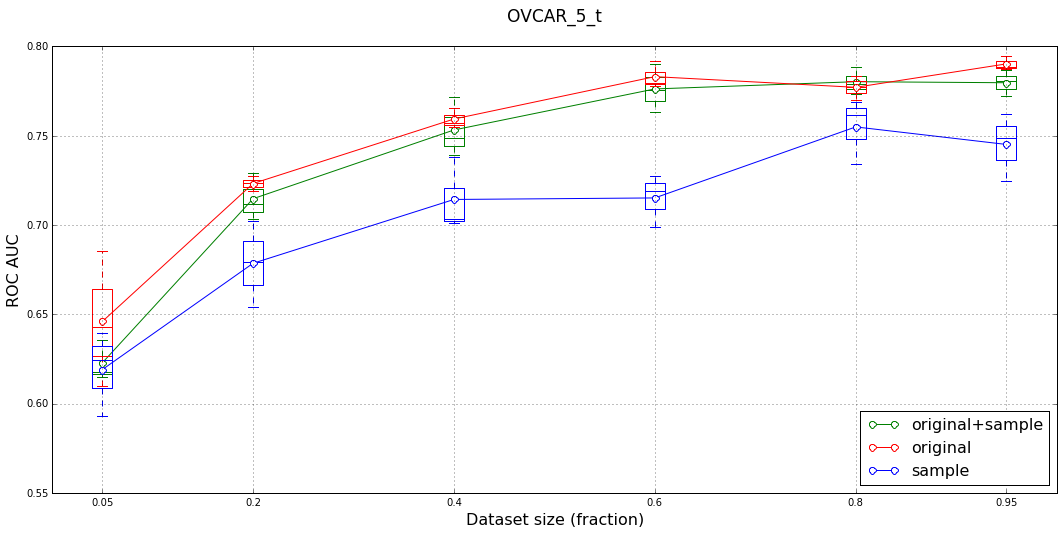

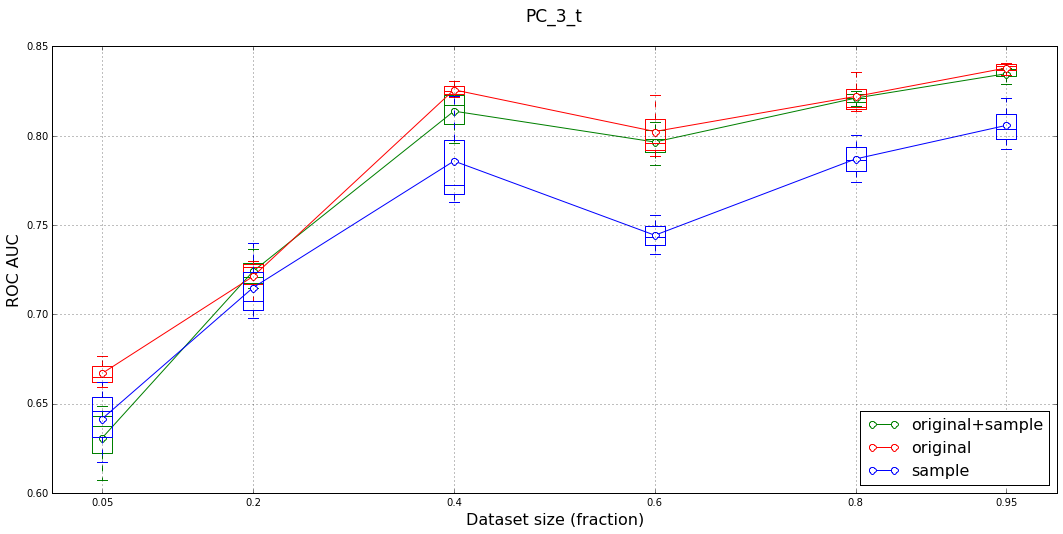

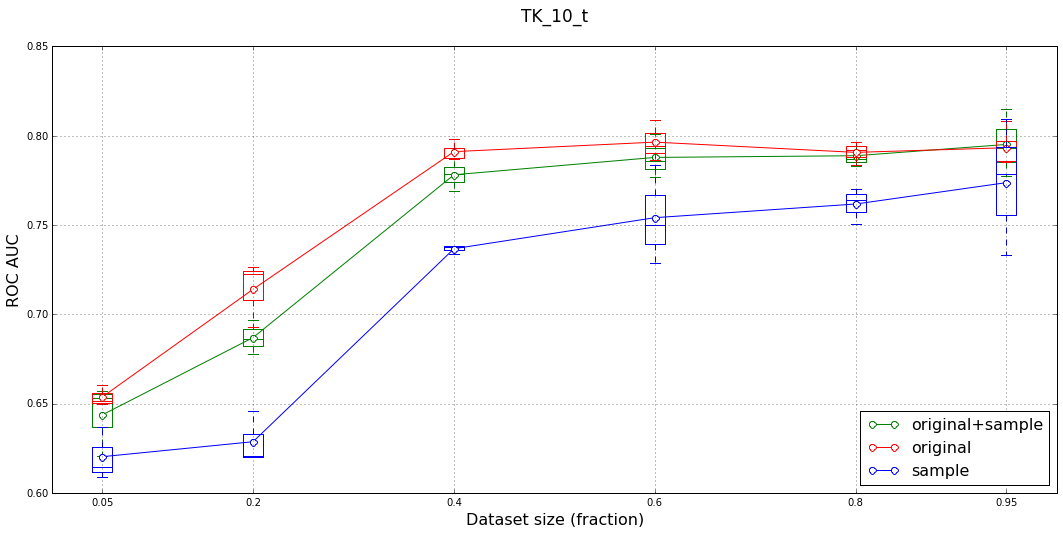

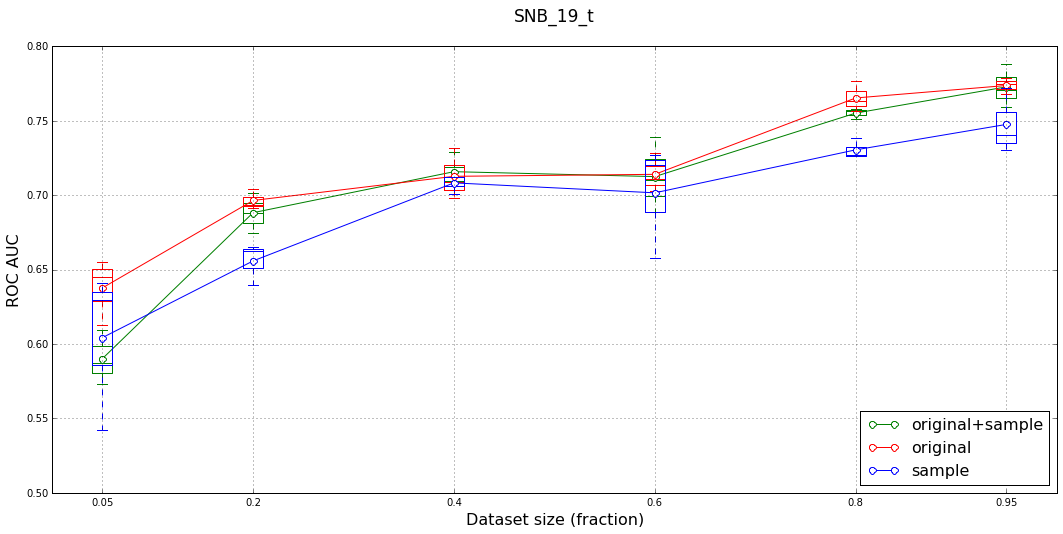

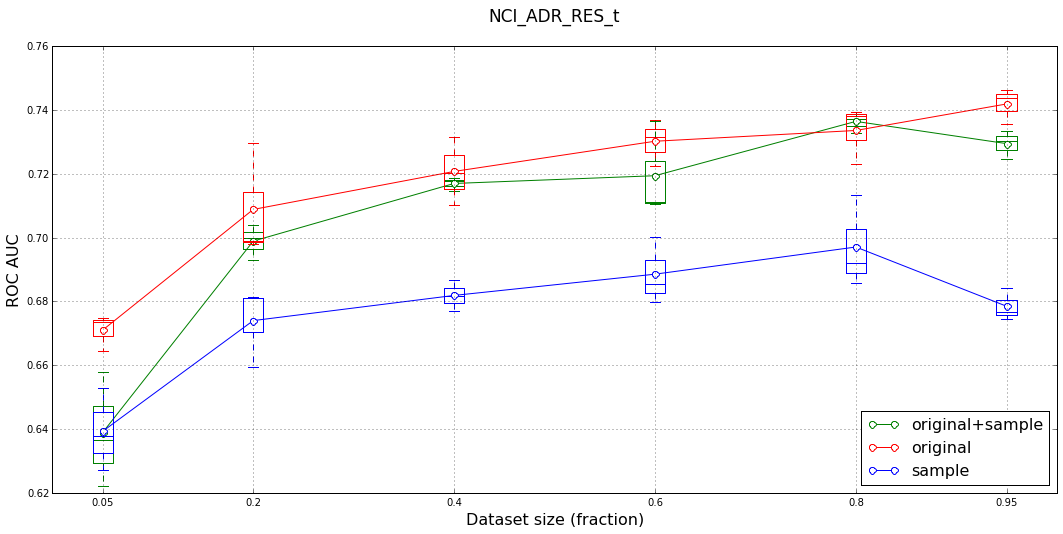

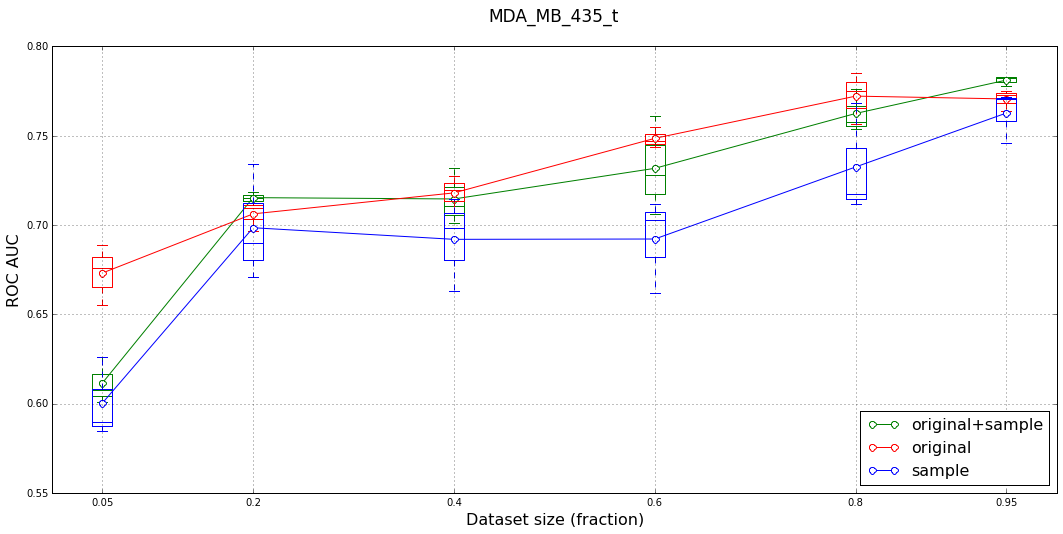

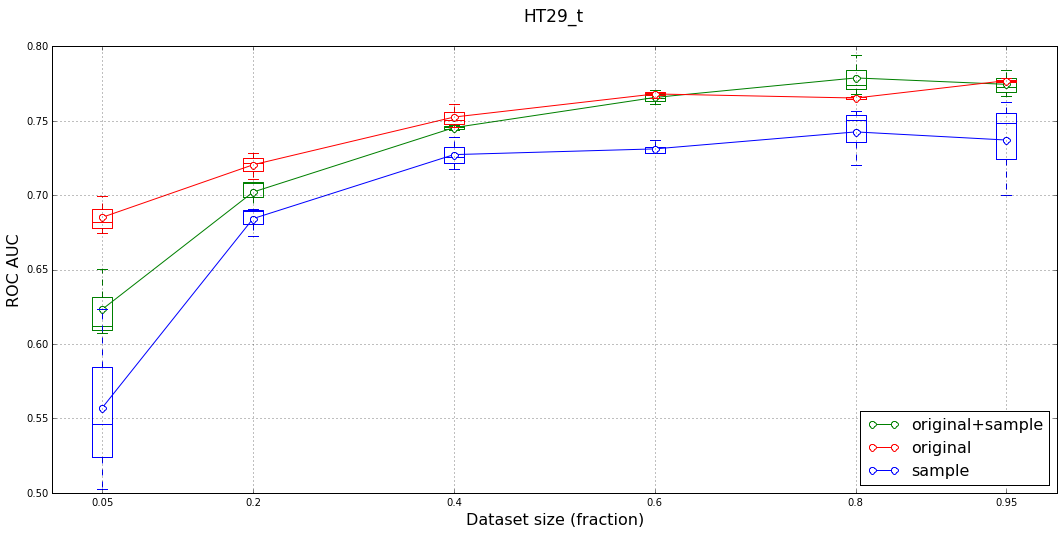

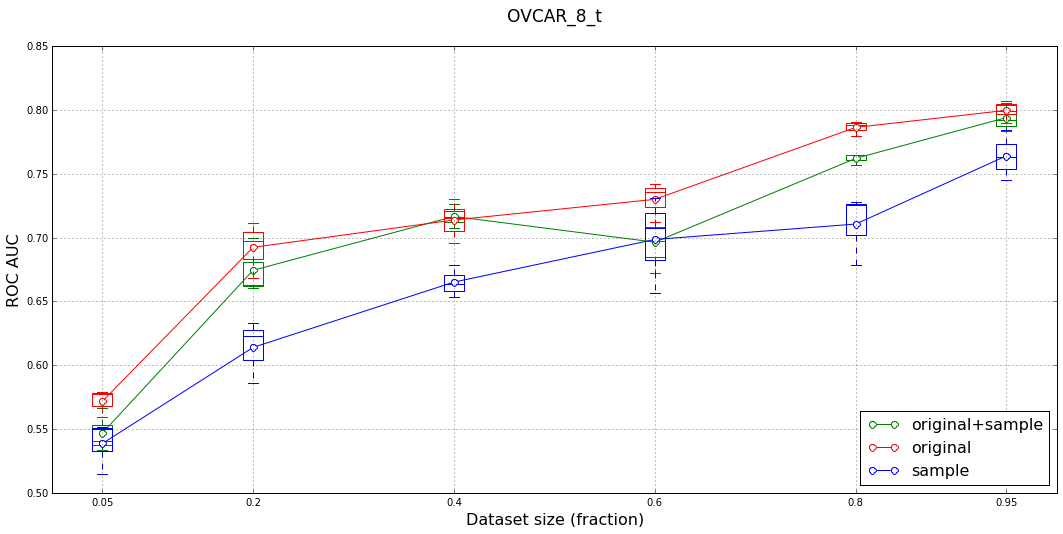

In [55]:
import os.path

performances=[]
for dataset in sorted(dataset_names):
    result_fname='%s_predictive_performance_of_samples.data'%dataset
    if os.path.exists(result_fname):
         performances.append((scores(result_fname),dataset))
            
for i, (score, dataset) in enumerate(sorted(performances, reverse=True)):
    result_fname='%s_predictive_performance_of_samples.data'%dataset
    if os.path.exists(result_fname):
        percentages_l, original_repetitions_l,original_sample_repetitions_l,sample_repetitions_l = load_results(result_fname)
        plot(dataset, percentages_l, original_sample_repetitions_l, original_repetitions_l, sample_repetitions_l)
        print('%2d %+.4f'%(i,score))

.